<a href="https://colab.research.google.com/github/mms-11/ML_algorithms/blob/main/Copy_of_CURVAROC_DIABETES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title abrir meu drive
from google.colab import drive

drive.mount('/content/MyDrive')



Mounted at /content/MyDrive


In [ ]:
# @title importar bibliotecas
import pandas as pd

import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np


In [ ]:
# @title Ler dataset diabetes
df = pd.read_csv('/content/MyDrive/My Drive/diabetes.csv')

df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
# @title treinar base de dados
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)


In [ ]:
# @title arvore aleatoria
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

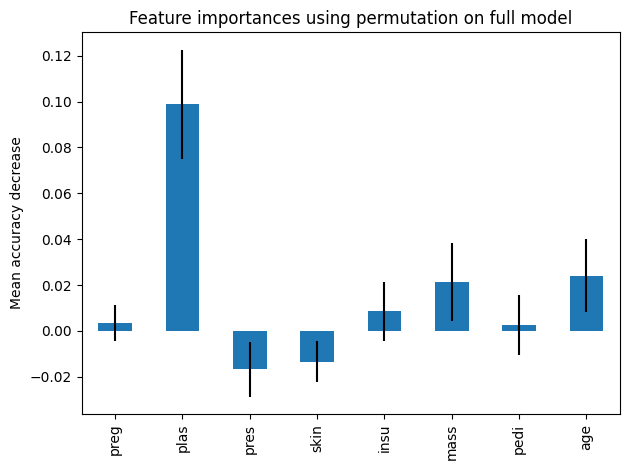

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(rf, X_test, Y_test,n_repeats=30, random_state=0)

forest_importances = pd.Series(result.importances_mean, index=X.columns)

fig, ax = plt.subplots()

forest_importances.plot.bar(yerr=result.importances_std, ax=ax)

ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# @title testando o modelo arvore aleatoria
from sklearn.metrics import accuracy_score

Yhat = rf.predict(X_test)

print("Acurácia dos dados de teste  : ", accuracy_score(Y_test,Yhat))

Acurácia dos dados de teste  :  0.7447916666666666


In [ ]:
# Returning the class probabilities if necessary --- obs.: class yes
rf.predict_proba(X_test)[:,1]

array([0.5 , 0.06, 0.02, 0.34, 0.06, 0.21, 0.03, 0.5 , 0.59, 0.36, 0.33,
       0.31, 0.22, 0.17, 0.3 , 0.77, 0.58, 0.28, 0.12, 0.  , 0.6 , 0.26,
       0.01, 0.53, 0.49, 0.26, 0.1 , 0.01, 0.56, 0.68, 0.79, 0.05, 0.01,
       0.15, 0.76, 0.74, 0.36, 0.02, 0.39, 0.39, 0.77, 0.31, 0.68, 0.29,
       0.01, 0.24, 0.13, 0.24, 0.47, 0.75, 0.54, 0.01, 0.42, 0.05, 0.1 ,
       0.12, 0.05, 0.77, 0.3 , 0.76, 0.02, 0.87, 0.15, 0.69, 0.49, 0.09,
       0.01, 0.18, 0.88, 0.39, 0.24, 0.09, 0.02, 0.17, 0.5 , 0.84, 0.86,
       0.4 , 0.5 , 0.05, 0.58, 0.11, 0.25, 0.47, 0.04, 0.47, 0.07, 0.41,
       0.67, 0.62, 0.49, 0.26, 0.36, 0.03, 0.61, 0.66, 0.3 , 0.18, 0.49,
       0.69, 0.16, 0.19, 0.09, 0.15, 0.58, 0.24, 0.24, 0.7 , 0.86, 0.4 ,
       0.02, 0.04, 0.33, 0.01, 0.06, 0.92, 0.55, 0.69, 0.62, 0.01, 0.11,
       0.32, 0.5 , 0.27, 0.5 , 0.62, 0.75, 0.44, 0.44, 0.01, 0.31, 0.24,
       0.2 , 0.22, 0.03, 0.1 , 0.11, 0.02, 0.44, 0.72, 0.03, 0.07, 0.68,
       0.67, 0.71, 0.52, 0.71, 0.41, 0.33, 0.71, 0.

In [ ]:
Yhat


array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negati

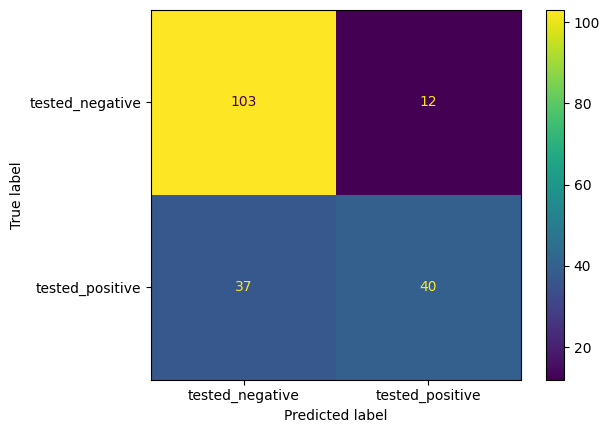

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Displaying the confusion matrix

cm = confusion_matrix(Y_test, Yhat, labels=rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()

plt.show()

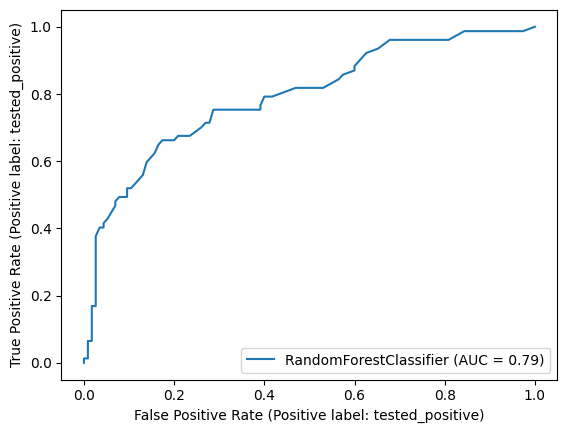

In [ ]:
# @title construindo curva ROC

from sklearn.metrics import RocCurveDisplay

#y_score = rf.decision_function(X_test)

#fpr, tpr, thresholds = metrics.roc_curve(y, pred)
#roc_auc = metrics.auc(fpr, tpr)
#display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
#...                                   estimator_name='example estimator')

RocCurveDisplay.from_estimator(rf, X_test, Y_test)

# display.plot()
# plt.show()